# <center> AUTOMOBILE PRICE PREDICTION USING ANN

This is a Regression type  of problem in which price of vehicles is predicted using ANN.
Data Set: '1985 Automobile Dataset' was taken from Kaggle.
 https://www.kaggle.com/datasets/fazilbtopal/auto85

#### Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

#### Loading the data

In [3]:
data = pd.read_csv("Automobile_data.csv")
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


#### Replacing "?" WITH np.nan

In [4]:
data.replace(to_replace='?', value=np.nan, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
data.shape

(205, 26)

In [8]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

#### Checking the null percentage

In [9]:
data.isnull().mean()*100

symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
aspiration            0.00000
num-of-doors          0.97561
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
wheel-base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb-weight           0.00000
engine-type           0.00000
num-of-cylinders      0.00000
engine-size           0.00000
fuel-system           0.00000
bore                  1.95122
stroke                1.95122
compression-ratio     0.00000
horsepower            0.97561
peak-rpm              0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 1.95122
dtype: float64

#### Dropping the null values

In [10]:
data.dropna(inplace=True)

#### Checking for duplicated values

In [11]:
data.duplicated().sum()

0

#### Renaming the columns

In [12]:
data.rename(columns={"normalized-losses":"Normalized_losses", "num-of-doors":"Num_of_doors", 'fuel-type':'Fuel_type','body-style':'Body_style', 'drive-wheels':'Drive_wheels', 'engine-location':'Engine_location','wheel-base':'Wheel_base','curb-weight':'Curb_weight', 'engine-type':'Engine_type','num-of-cylinders':'Num_of_cylinders', 'engine-size':'Engine_size', 'fuel-system':'Fuel_system','compression-ratio':'Compression_ratio','peak-rpm':'Peak_rpm', 'city-mpg':'City_mpg',
       'highway-mpg':'Highway-mpg'}, inplace=True)

### Explaratory Data Analysis

#### Univariate Analysis

In [13]:
univariate_list = []

In [14]:
for i in data.columns:
    if data[i].dtype != 'object':
        univariate_list.append(i)

In [15]:
univariate_list

['symboling',
 'Wheel_base',
 'length',
 'width',
 'height',
 'Curb_weight',
 'Engine_size',
 'Compression_ratio',
 'City_mpg',
 'Highway-mpg']

#### Histogram

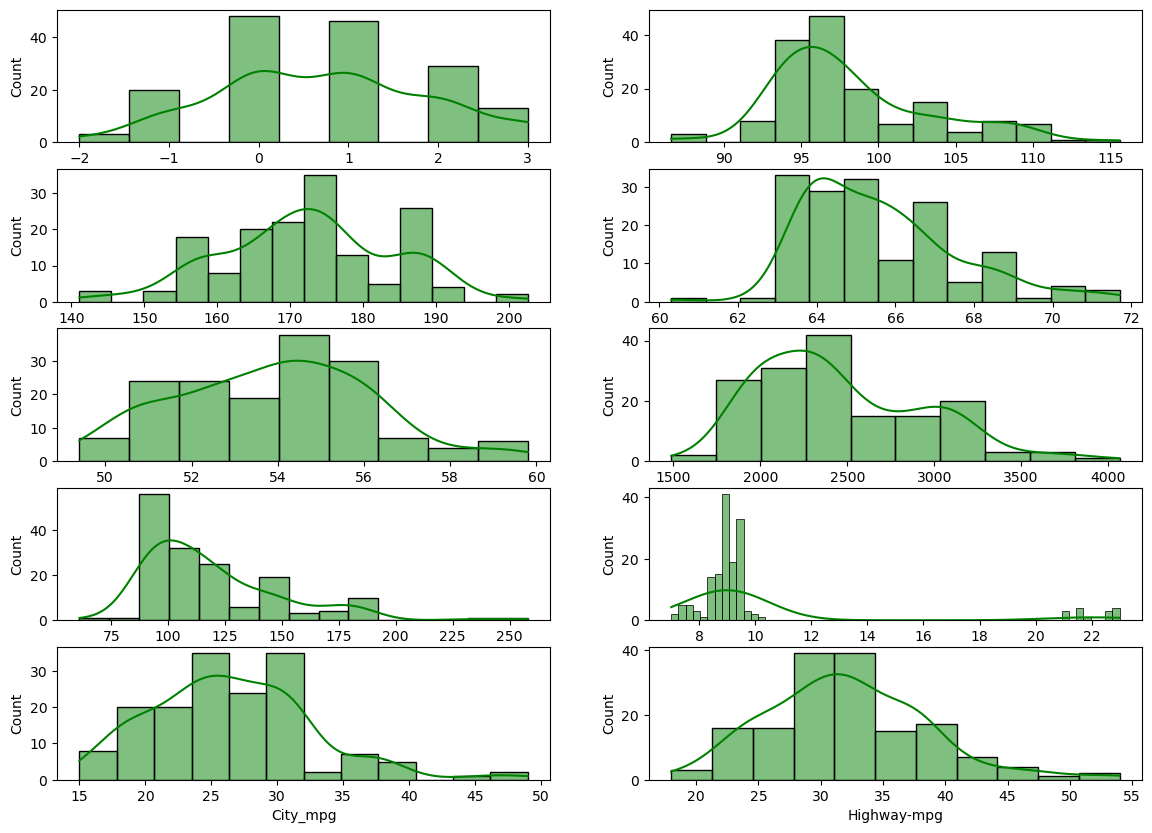

In [16]:
plt.figure(figsize=(14, 10))
for i in enumerate(univariate_list):
    plt.subplot(5, 2, i[0]+1)
    sns.histplot(data=data, x=i[1], color='green', kde=True)

#### Box plot

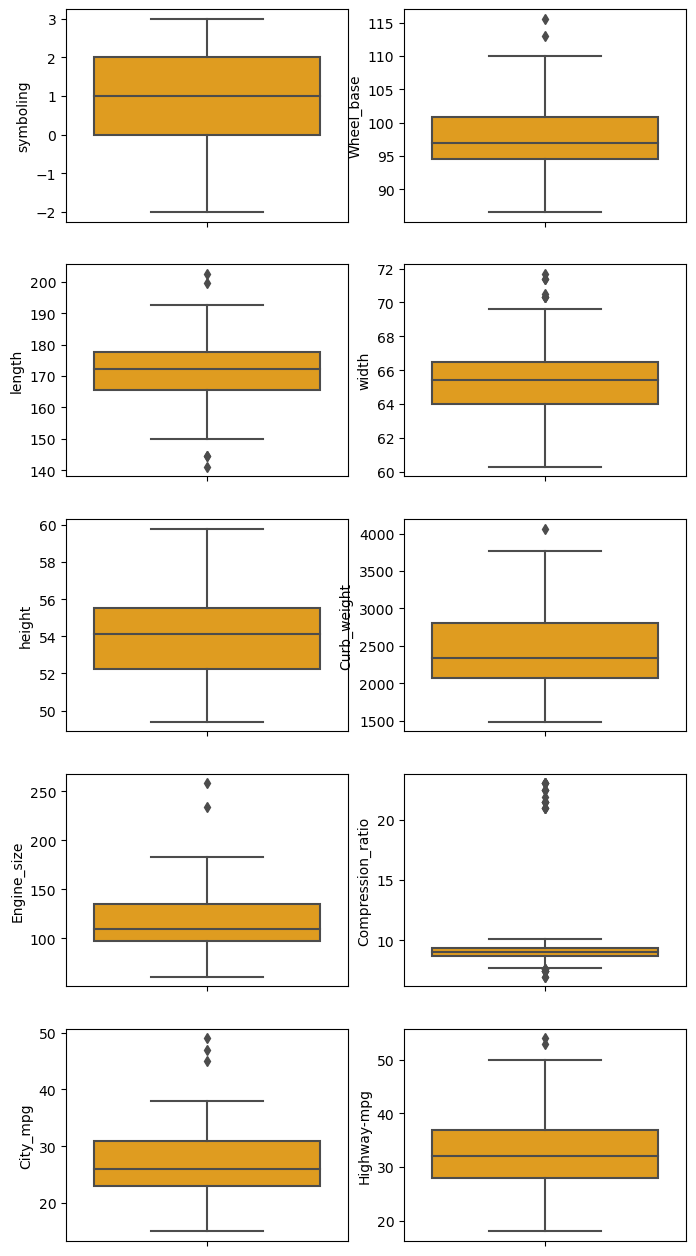

In [17]:
plt.figure(figsize=(8, 16))
for i in enumerate(univariate_list):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(data=data, y=i[1], color='orange')

#### We can see that therea are some outliers

#### Violin plots

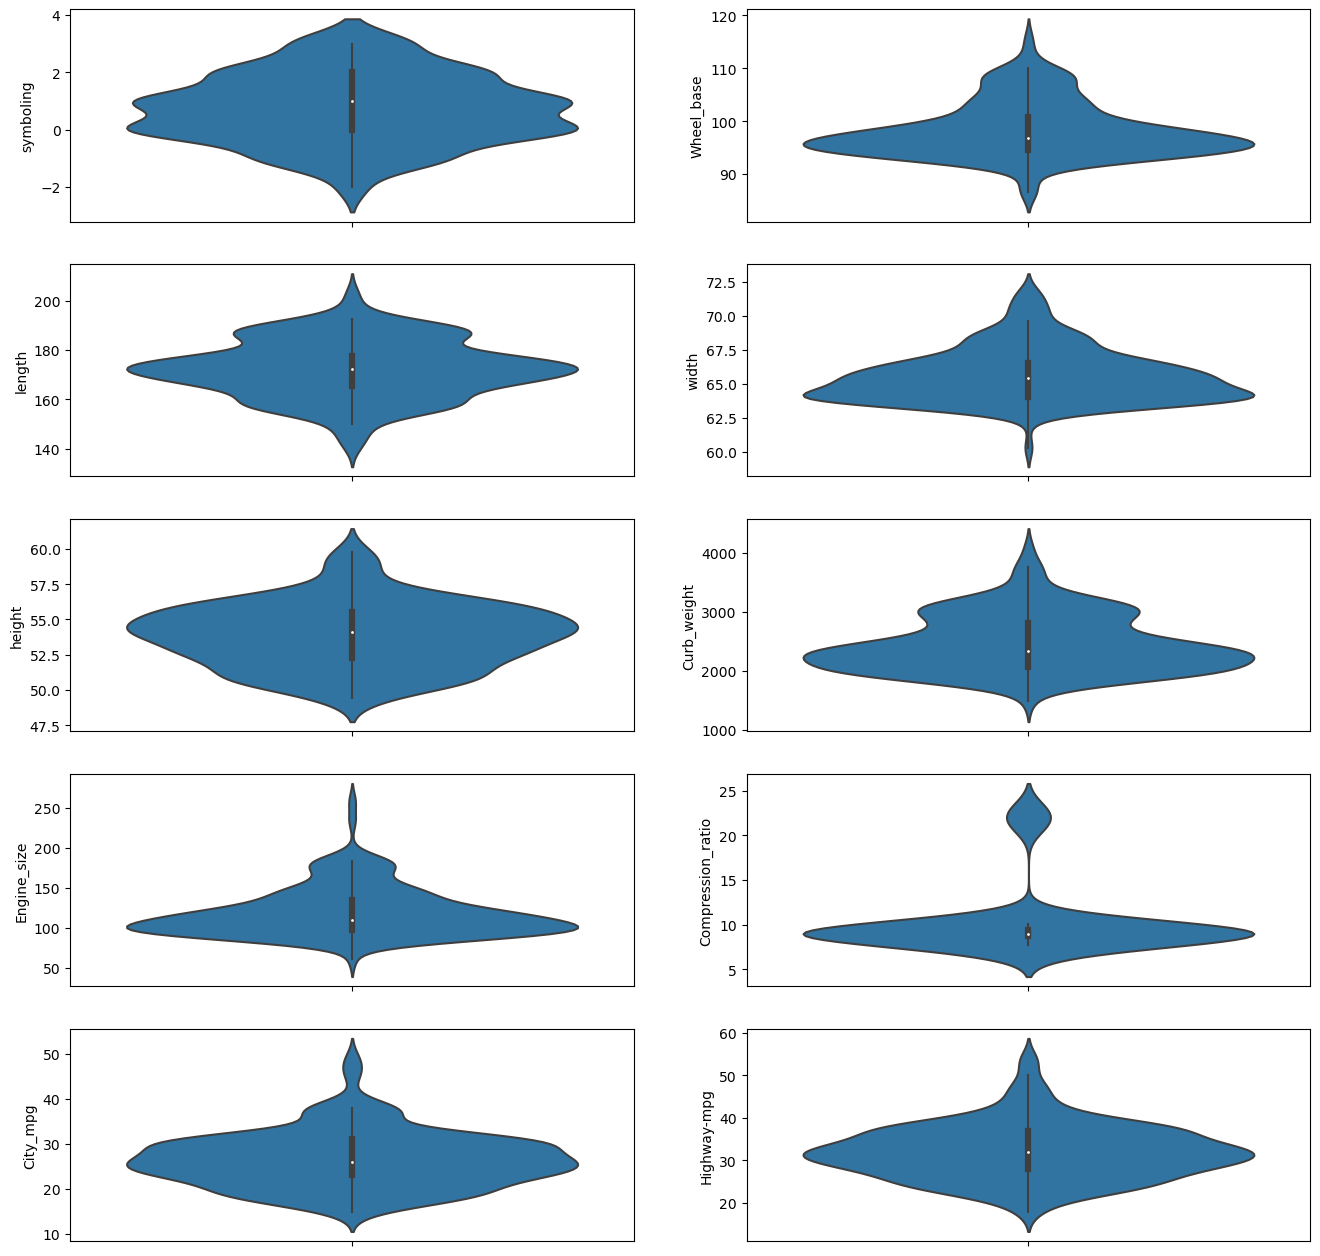

In [18]:
plt.figure(figsize=(16, 16))
for i in enumerate(univariate_list):
    plt.subplot(5,2,i[0]+1)
    sns.violinplot(data=data, y=i[1])

#### Changing the data type of columns.

In [19]:
cat_col_list_int = ["Normalized_losses", "horsepower", "Peak_rpm", "bore", "stroke","price"]

In [20]:
for i in cat_col_list_int:
    data[i] = data[i].astype("float")

#### Multivariate analysis

#### Count plots

In [21]:
categorical_list = []
for i in data.columns:
    if data[i].dtype == 'object':
        categorical_list.append(i)

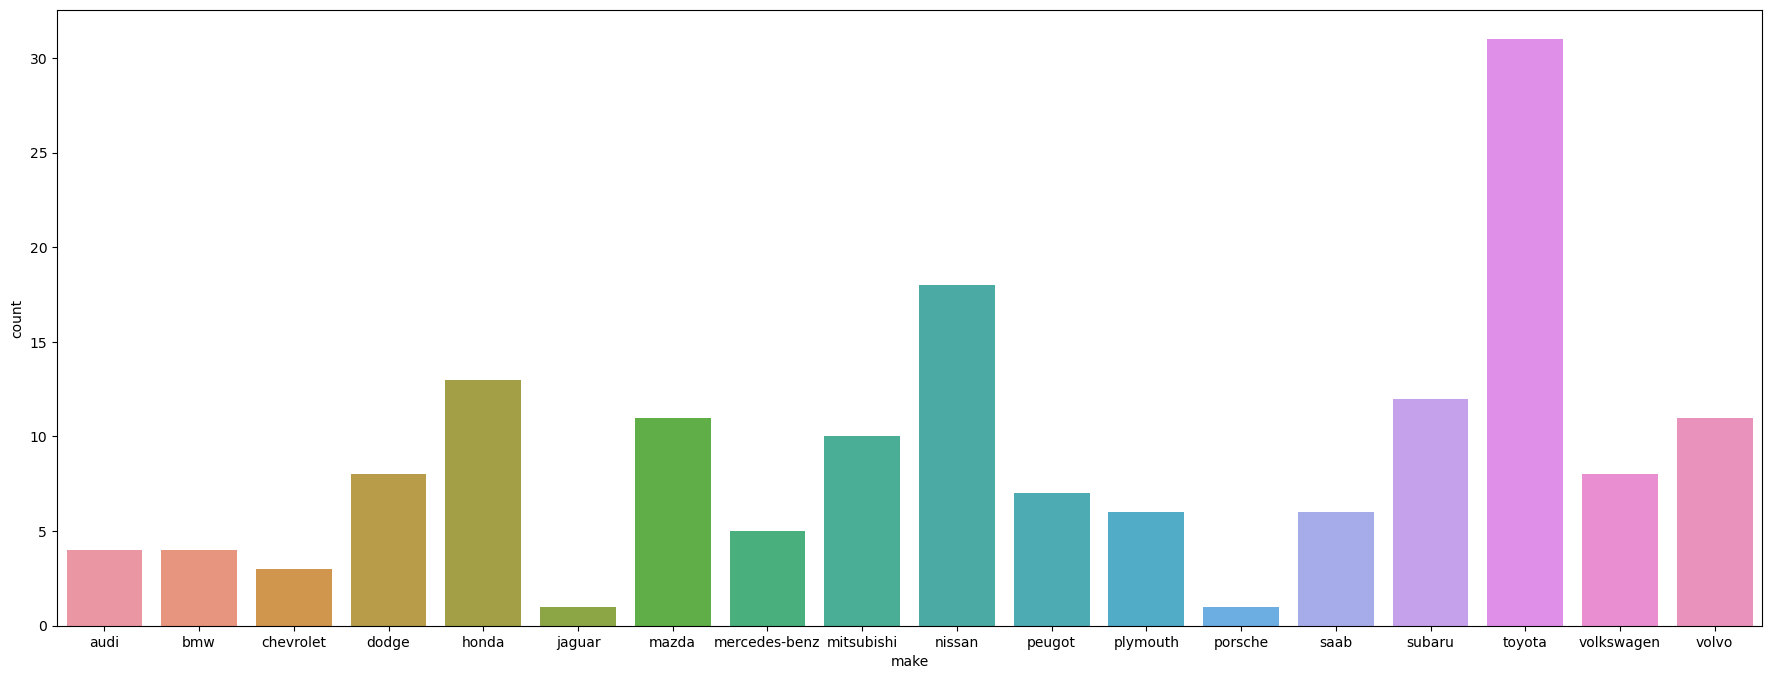

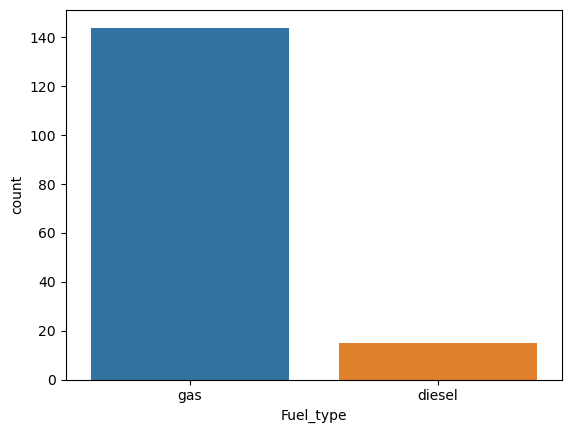

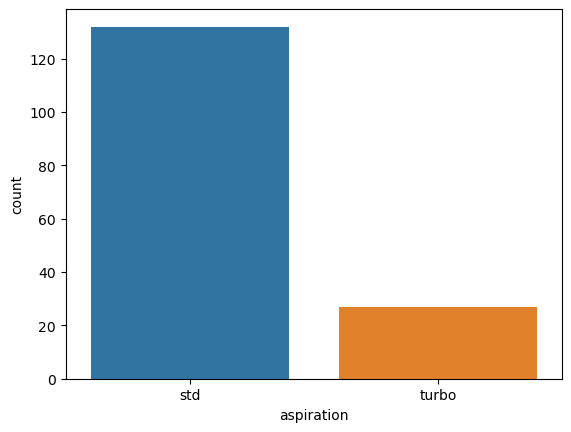

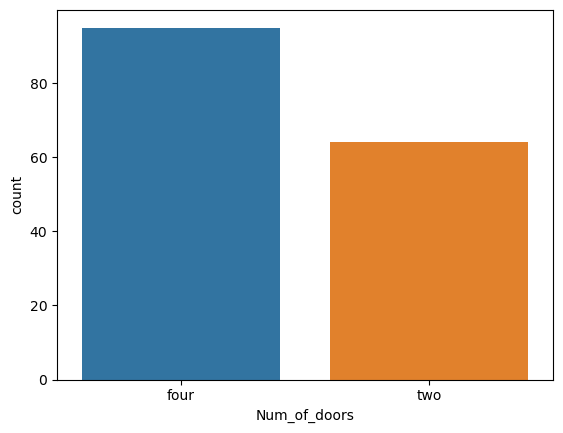

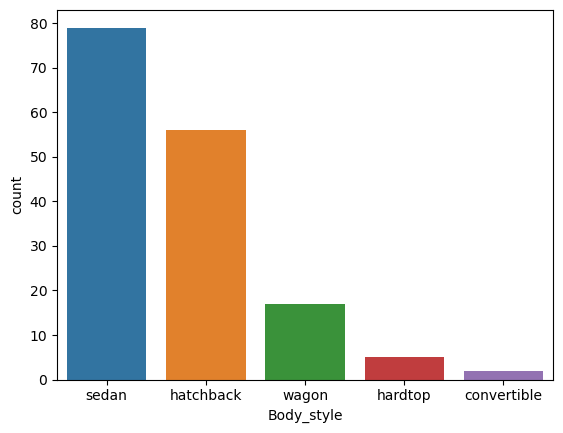

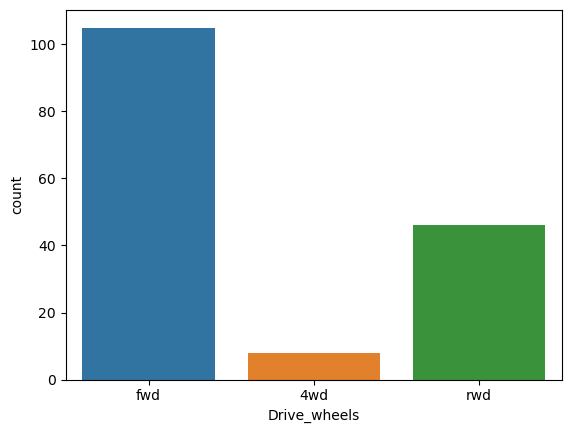

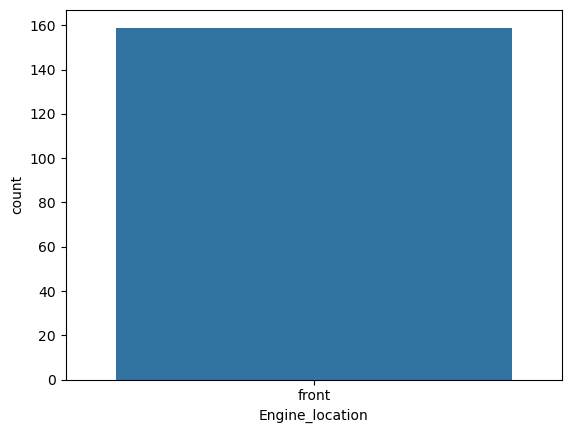

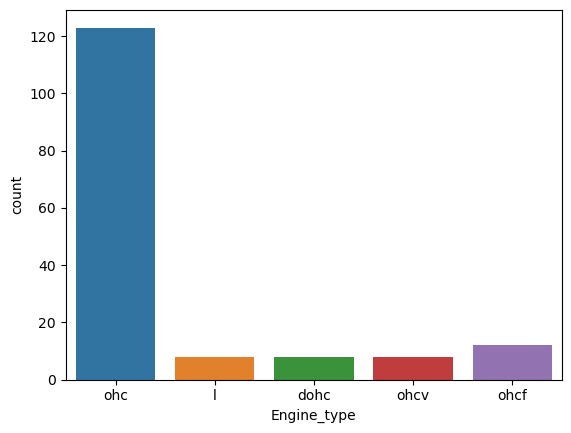

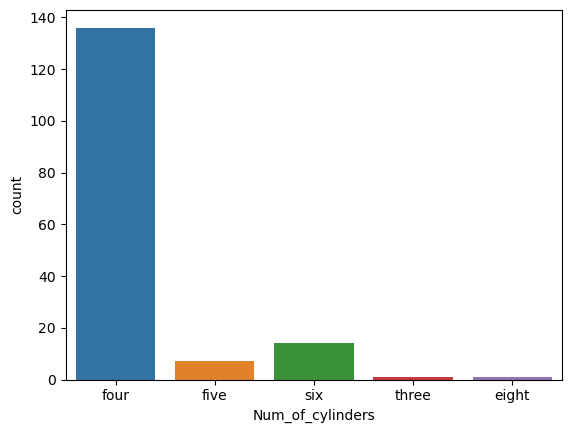

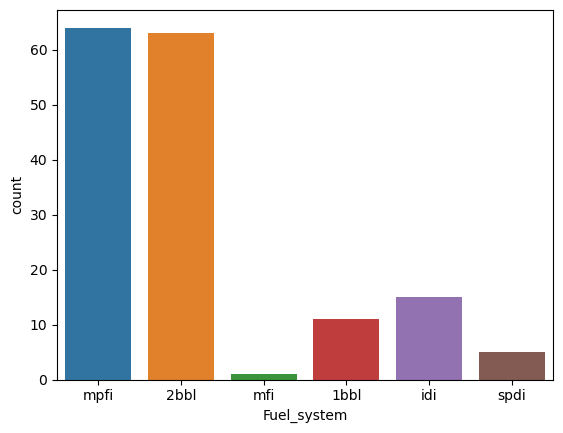

In [22]:
plt.figure(figsize=(22, 8))
for i in categorical_list:
    sns.countplot(data=data, x=data[i])
    plt.show()

#### Bar plot

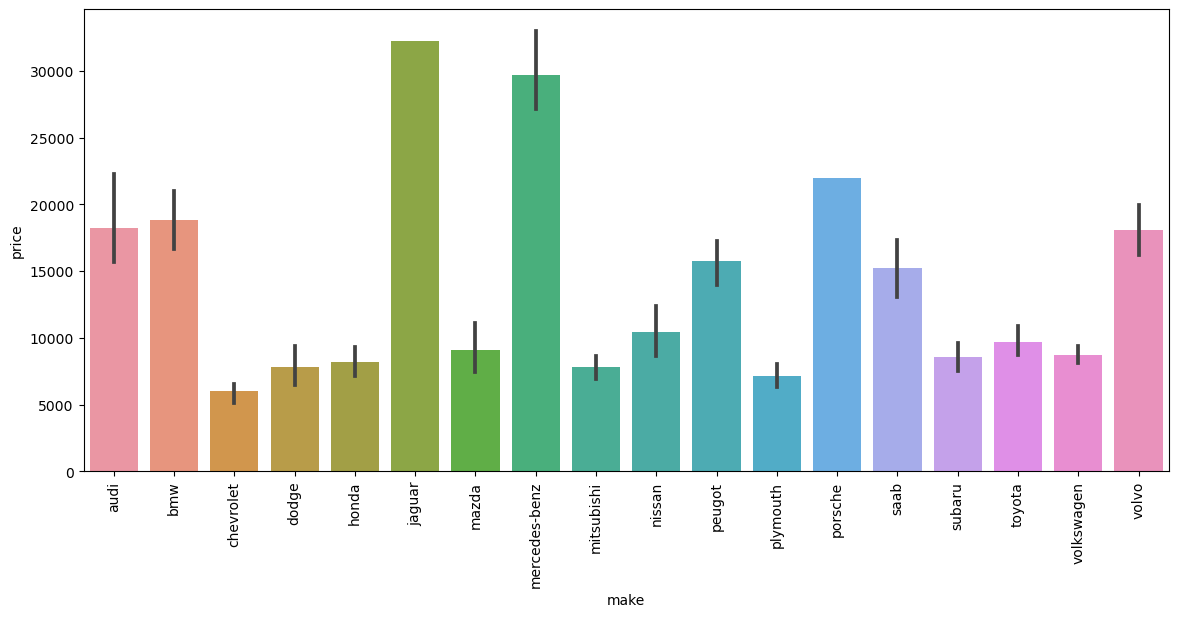

In [23]:
plt.figure(figsize=(14,6))
sns.barplot(data=data, x='make', y='price')
plt.xticks(rotation=90)
plt.show()

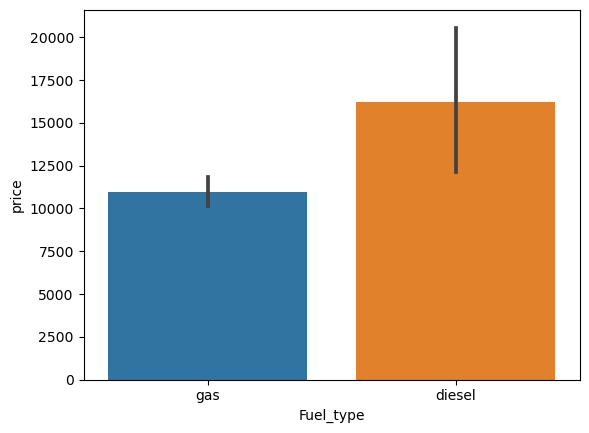

In [24]:
sns.barplot(data=data, x='Fuel_type', y='price')
plt.show()

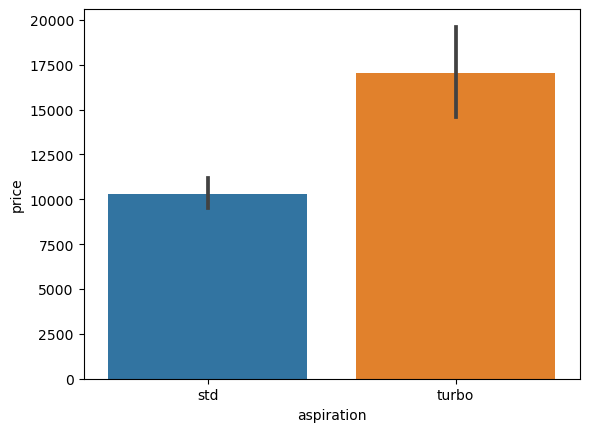

In [25]:
sns.barplot(data=data, x='aspiration', y='price')
plt.show()

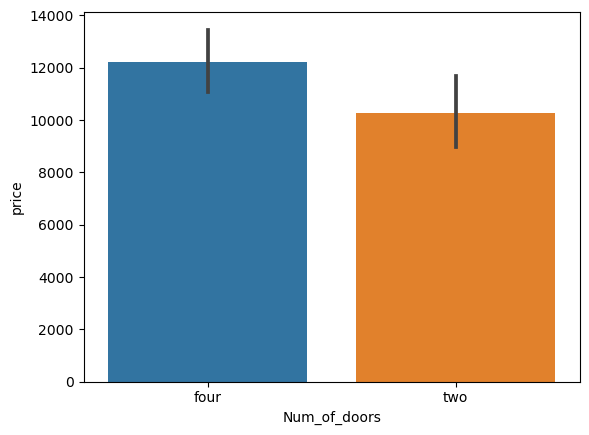

In [26]:
sns.barplot(data=data, x='Num_of_doors', y='price')
plt.show()

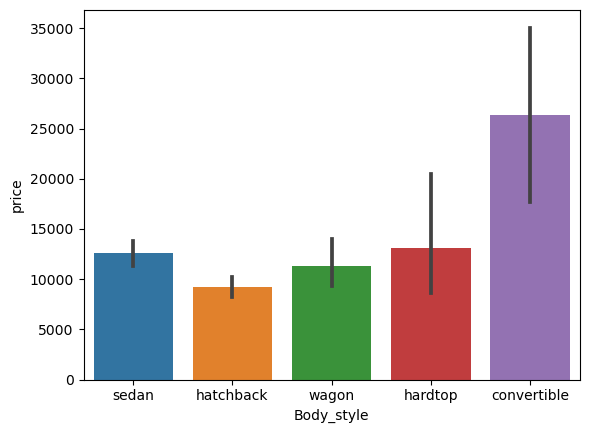

In [27]:
sns.barplot(data=data, x='Body_style', y='price')
plt.show()

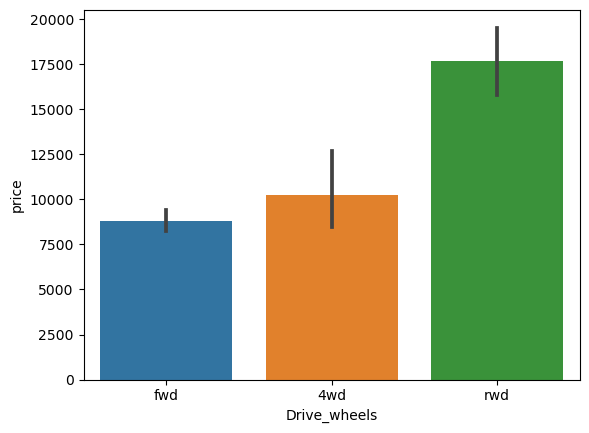

In [28]:
sns.barplot(data=data, x='Drive_wheels', y='price')
plt.show()

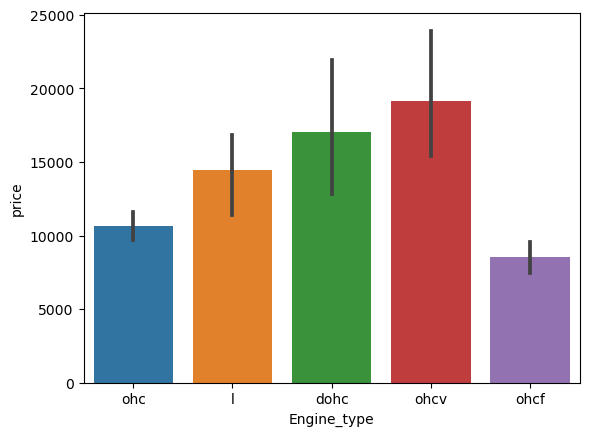

In [29]:
sns.barplot(data=data, x='Engine_type', y='price')
plt.show()

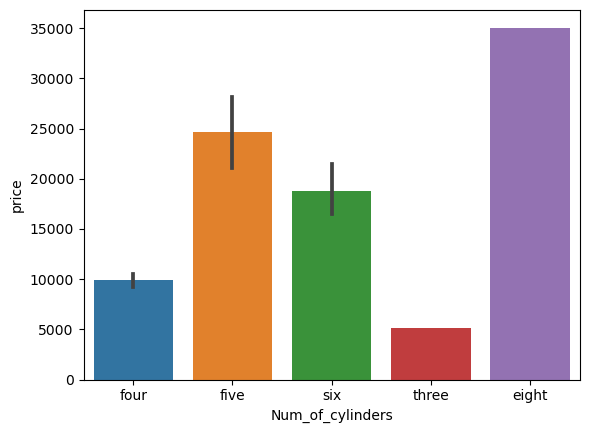

In [30]:
sns.barplot(data=data, x='Num_of_cylinders', y='price')
plt.show()

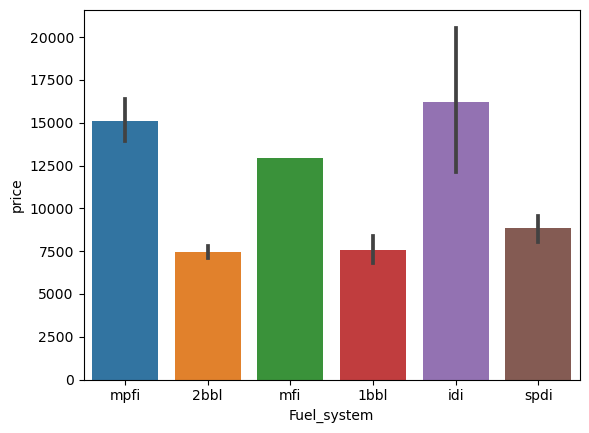

In [31]:
sns.barplot(data=data, x='Fuel_system', y='price')
plt.show()

#### Pair plot

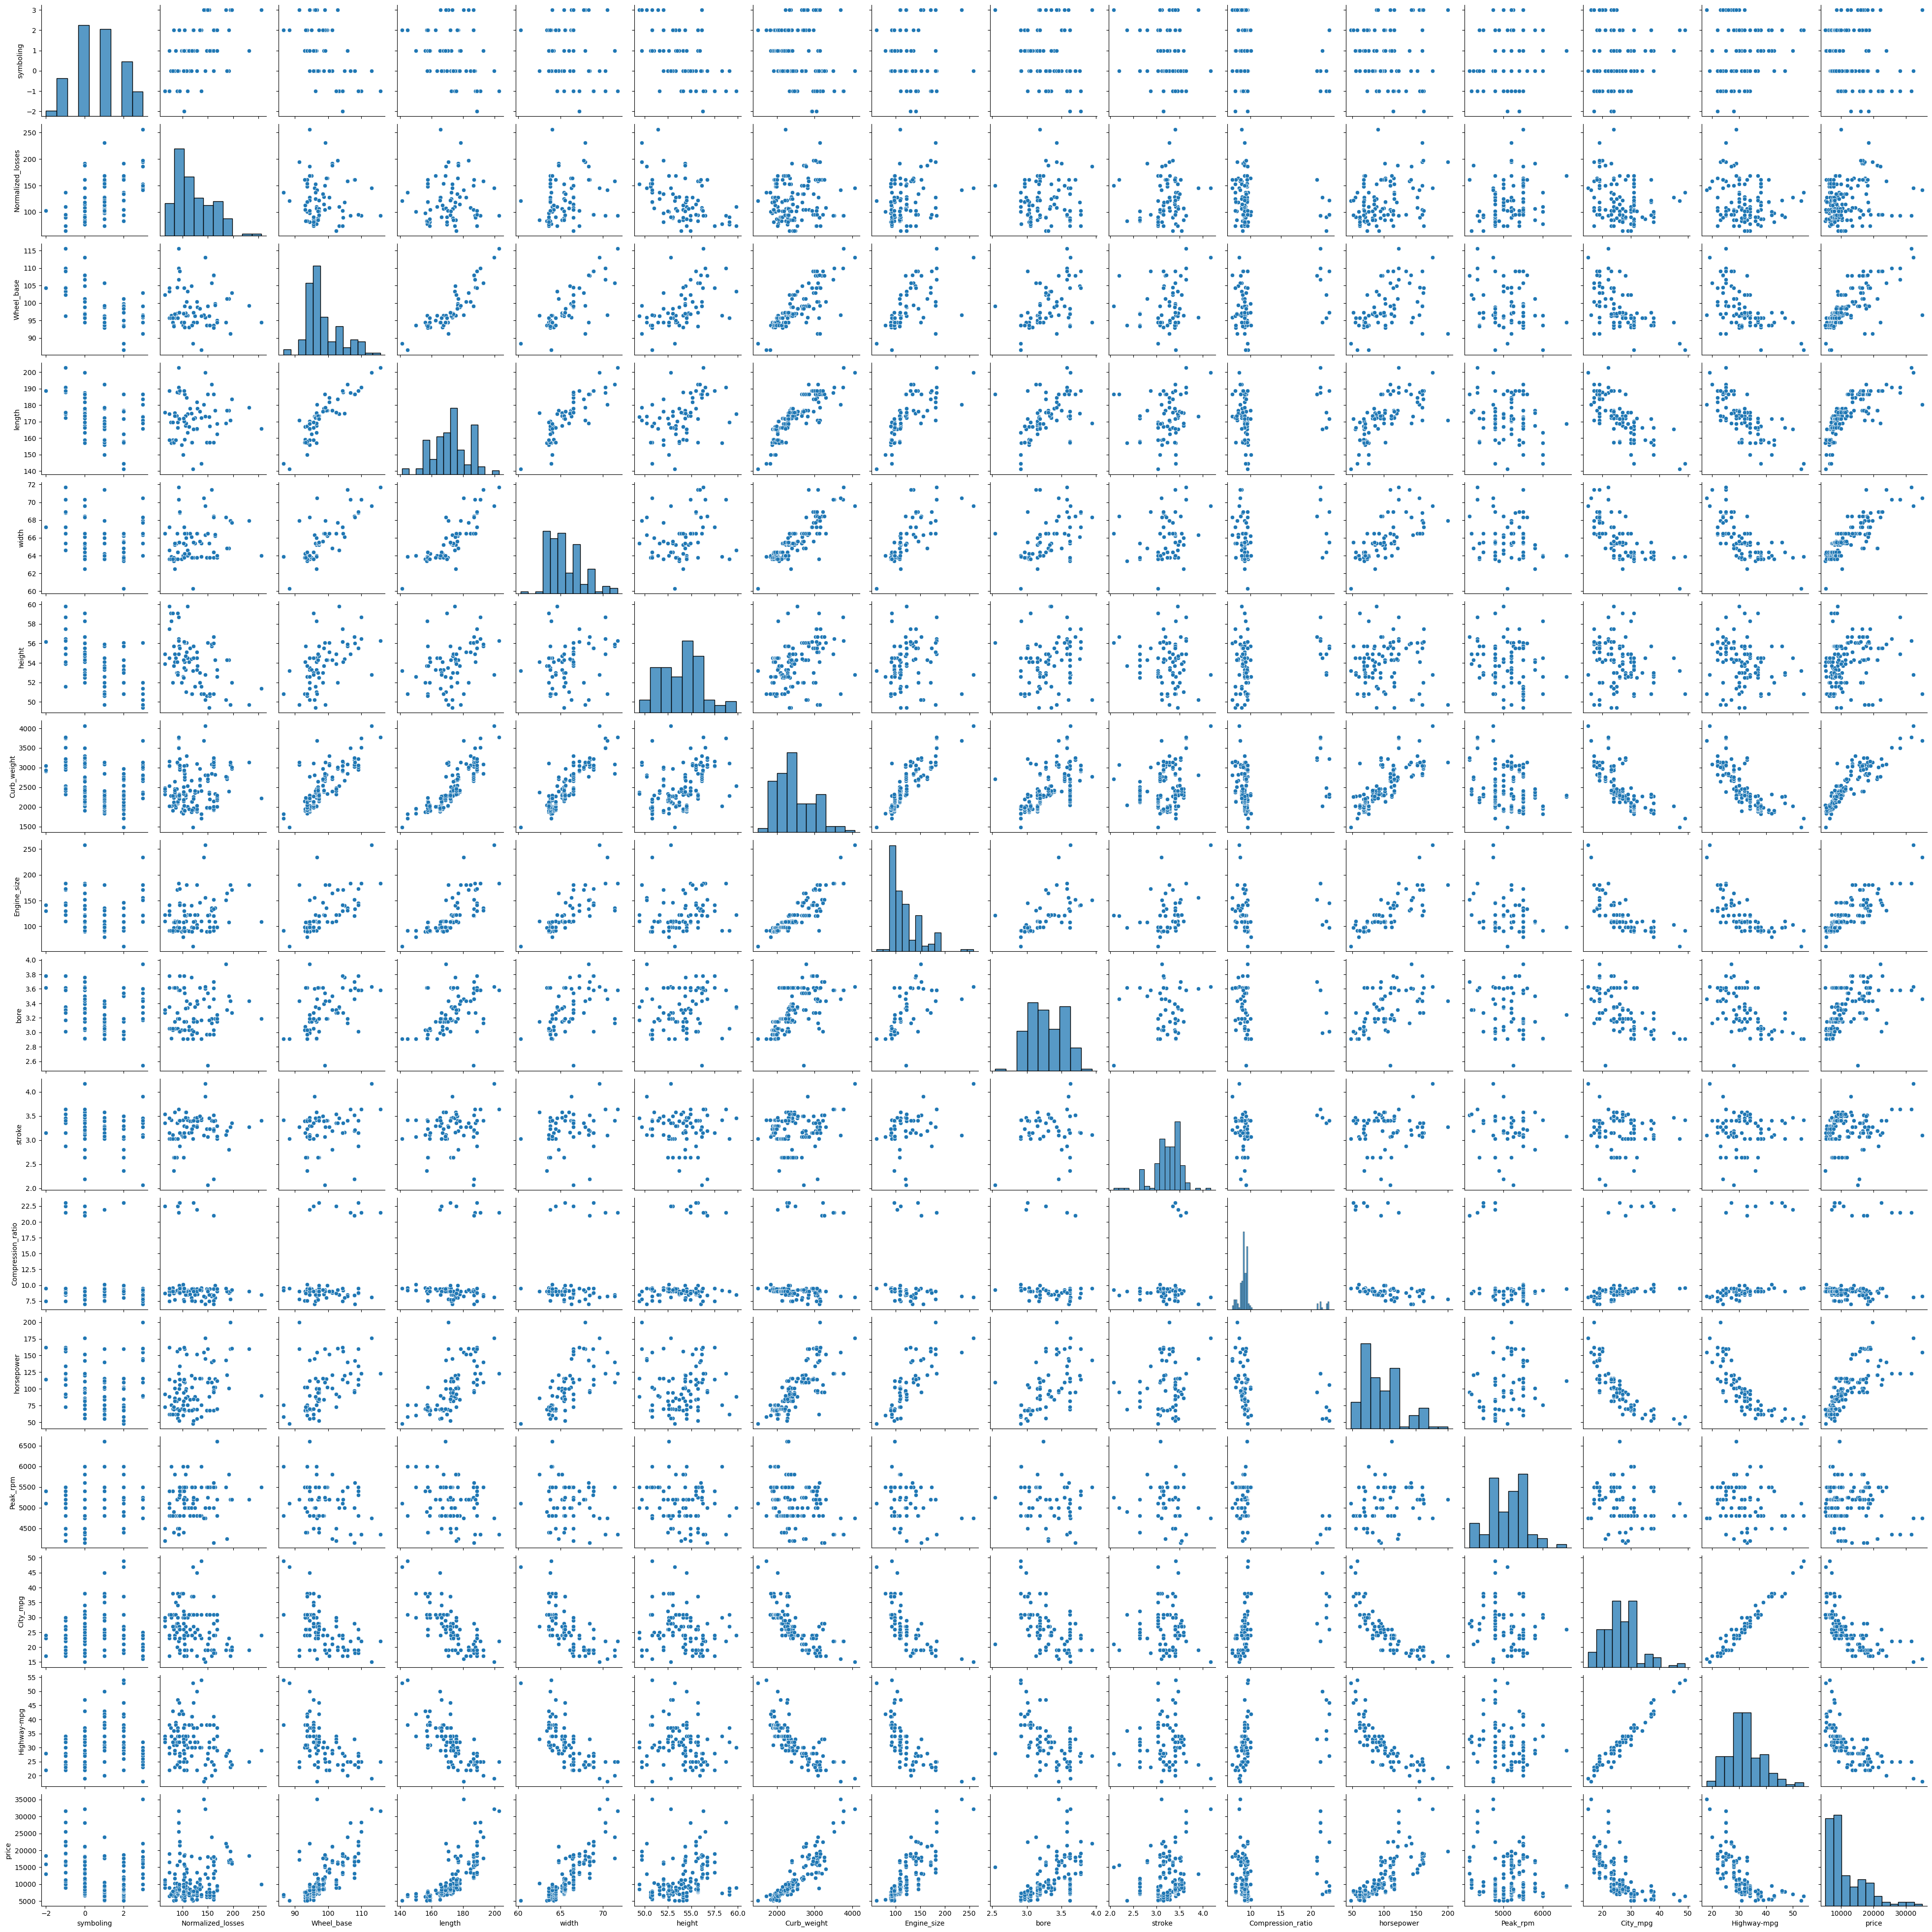

In [32]:
sns.pairplot(data)
plt.show()

#### Lets change the number of doors into corresponding numerical values.

In [33]:
data.Num_of_doors.replace({"four":4, "two":2,"six":6, "five":5, "three":3, "eight":8},inplace=True)

#### Lets change the number of cylinders into corresponding numerical values.

In [34]:
data.Num_of_cylinders.replace({'four':4, 'six':6 ,'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}, inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   Normalized_losses  159 non-null    float64
 2   make               159 non-null    object 
 3   Fuel_type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   Num_of_doors       159 non-null    int64  
 6   Body_style         159 non-null    object 
 7   Drive_wheels       159 non-null    object 
 8   Engine_location    159 non-null    object 
 9   Wheel_base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  Curb_weight        159 non-null    int64  
 14  Engine_type        159 non-null    object 
 15  Num_of_cylinders   159 non-null    int64  
 16  Engine_size        159 non

#### OUTLIER TREATMENT

#### BOXPLOT

In [36]:
features = []

In [37]:
for i in data.columns:
    if data[i].dtypes != 'object':
        features.append(i)

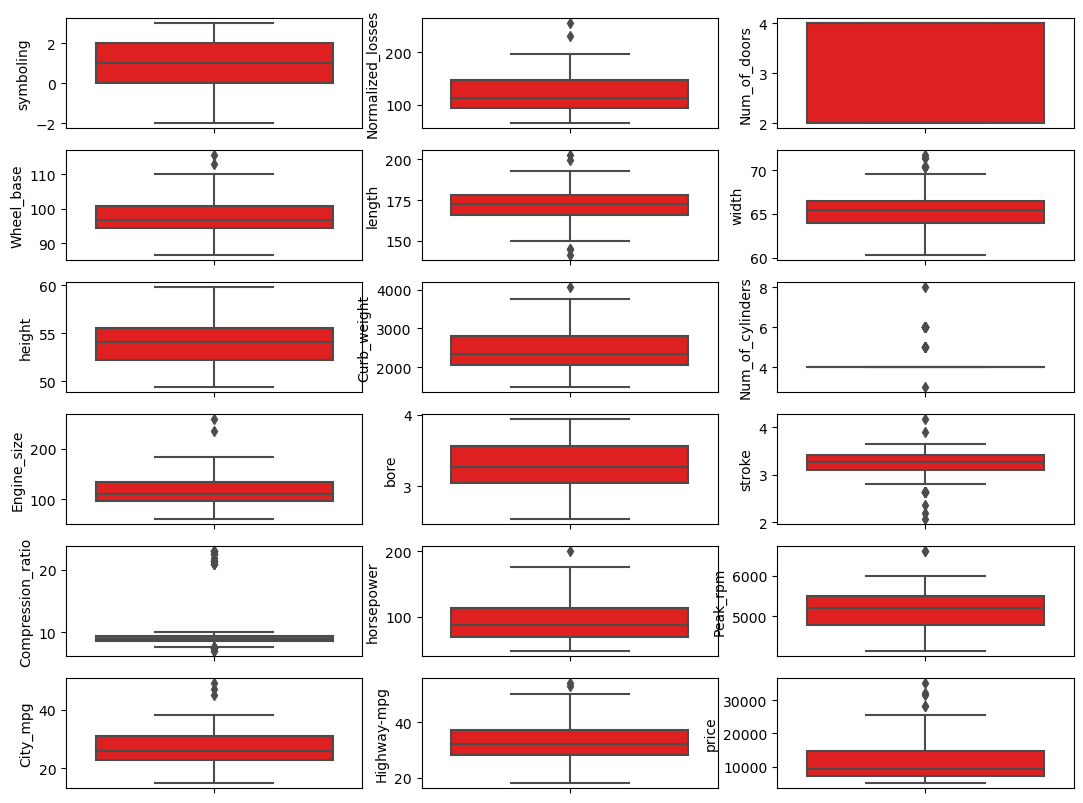

In [38]:
plt.figure(figsize=(13,10))
for i in enumerate(features):
    plt.subplot(6,3,i[0]+1)
    sns.boxplot(data=data, y=i[1], color='red')

#### SETTING OUTLIER LIMITS:

In [39]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

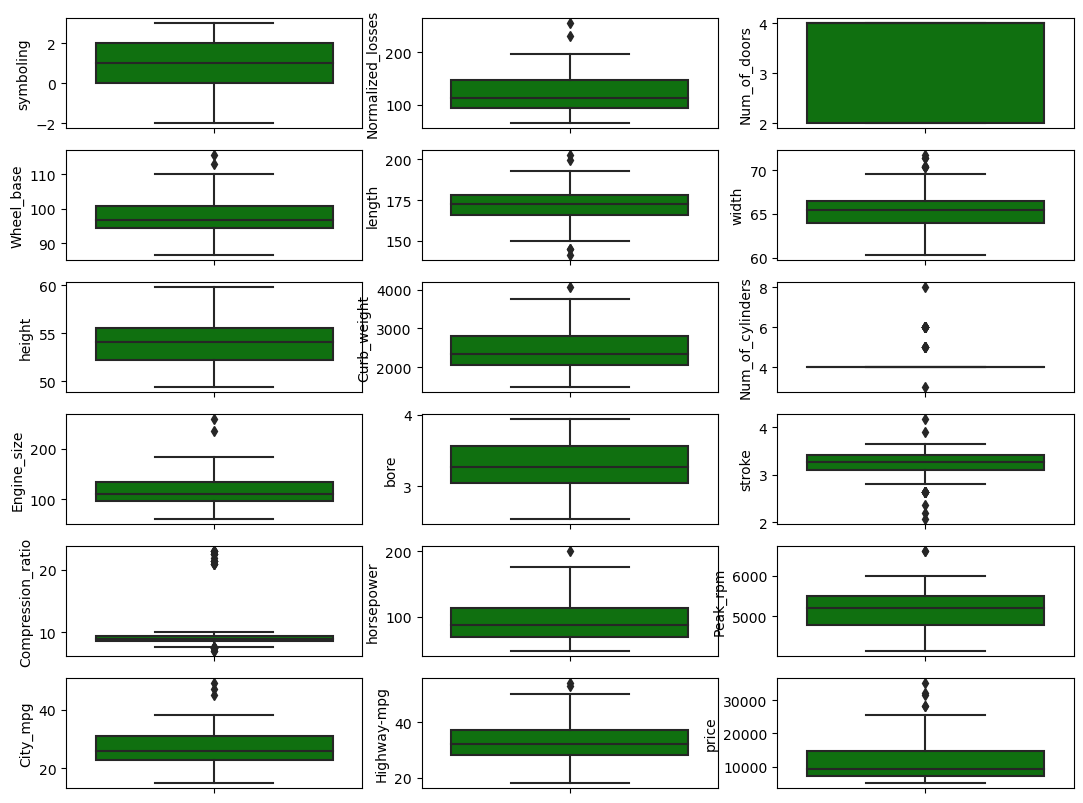

In [40]:
plt.figure(figsize=(13,10))
for i in enumerate(features):
    plt.subplot(6, 3, i[0]+1)
    sns.boxplot(data=data, y=i[1], color='green')

In [41]:
data.dropna(inplace=True)

#### Label Encoding 

In [42]:
for col in data.columns:
    if data[col].dtypes == 'object':
        print(col)

make
Fuel_type
aspiration
Body_style
Drive_wheels
Engine_location
Engine_type
Fuel_system


In [43]:
label_encoders = {}
categorical_columns = ["make","Fuel_type", "aspiration","Body_style", "Drive_wheels", "Engine_location","Engine_type","Num_of_cylinders"
,"Fuel_system","bore","stroke"]

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [44]:
data.head()

,symboling,Normalized_losses,make,Fuel_type,aspiration,Num_of_doors,Body_style,Drive_wheels,Engine_location,Wheel_base,length,width,height,Curb_weight,Engine_type,Num_of_cylinders,Engine_size,Fuel_system,bore,stroke,Compression_ratio,horsepower,Peak_rpm,City_mpg,Highway-mpg,price
3,2,164.0,0,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,2,1,109,4,12,20,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,0,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,2,2,136,4,12,20,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,0,1,0,4,3,1,0,105.8,192.7,71.4,55.7,2844,2,2,136,4,12,20,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,0,1,1,4,3,1,0,105.8,192.7,71.4,55.9,3086,2,2,131,4,9,20,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,1,1,0,2,3,2,0,101.2,176.8,64.8,54.3,2395,2,1,108,4,22,4,8.8,101.0,5800.0,23,29,16430.0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   Normalized_losses  159 non-null    float64
 2   make               159 non-null    int32  
 3   Fuel_type          159 non-null    int32  
 4   aspiration         159 non-null    int32  
 5   Num_of_doors       159 non-null    int64  
 6   Body_style         159 non-null    int32  
 7   Drive_wheels       159 non-null    int32  
 8   Engine_location    159 non-null    int32  
 9   Wheel_base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  Curb_weight        159 non-null    int64  
 14  Engine_type        159 non-null    int32  
 15  Num_of_cylinders   159 non-null    int64  
 16  Engine_size        159 non

#### We can see that all the columns are now numerical.

#### FEATURE SELECTION BASED ON CORRELATION WITH TARGET VARIABLE

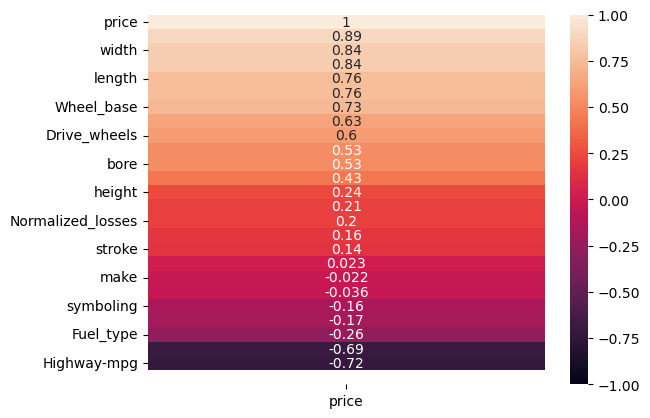

In [46]:
sns.heatmap(data.corr()[['price']].sort_values(by='price', ascending=False), vmax=1, vmin=-1, annot=True)
plt.show()

#### Correlation with output variable

In [47]:
correlation_target = abs(data.corr()["price"])

#### Selecting highly correlated features

In [48]:
relevant_features = correlation_target[correlation_target>0.75]
relevant_features

length         0.760952
width          0.843371
Curb_weight    0.893639
Engine_size    0.841496
horsepower     0.759874
price          1.000000
Name: price, dtype: float64

In [49]:
relevant_features

length         0.760952
width          0.843371
Curb_weight    0.893639
Engine_size    0.841496
horsepower     0.759874
price          1.000000
Name: price, dtype: float64

In [50]:
Relevant_list = relevant_features.index

In [51]:
Relevant_list

Index(['length', 'width', 'Curb_weight', 'Engine_size', 'horsepower', 'price'], dtype='object')

###### As we can see, only some features  are highly correlated with the output variable "price". Hence we will drop all other features apart from these.

In [52]:
x = data[['length', 'width', 'Curb_weight', 'Engine_size', 'horsepower', 'price']].values

In [53]:
x.shape

(159, 6)

In [54]:
y = data.iloc[:, -1].values
y.shape

(159,)

#### Splitting the data into training and test set

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Feature scaling

In [56]:
sc = StandardScaler()

In [57]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Setting random seed for reprodacibility

In [58]:
tf.random.set_seed(42)

#### Define the model architecture

In [59]:
model = keras.Sequential()

In [60]:
model.add(layers.Dense(128, activation='relu', input_dim = x_train.shape[1]))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))

#### Compiling the model

In [61]:
model.compile(optimizer='adam',loss='mean_squared_error')

#### Define early stopping criteria

In [62]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=50,
    verbose=1    
)

#### Train the model with early stopping

In [63]:
history = model.fit(x_train, y_train, batch_size=32,callbacks=[early_stopping],epochs=5000, validation_data=(x_test, y_test))

Epoch 1/5000
4/4 [==============================] - 2s 277ms/step - loss: 168083968.0000 - val_loss: 154416752.0000
Epoch 2/5000
4/4 [==============================] - 0s 11ms/step - loss: 168072736.0000 - val_loss: 154404736.0000
Epoch 3/5000
4/4 [==============================] - 0s 11ms/step - loss: 168059424.0000 - val_loss: 154392288.0000
Epoch 4/5000
4/4 [==============================] - 0s 11ms/step - loss: 168045232.0000 - val_loss: 154378784.0000
Epoch 5/5000
4/4 [==============================] - 0s 10ms/step - loss: 168028944.0000 - val_loss: 154362560.0000
Epoch 6/5000
4/4 [==============================] - 0s 10ms/step - loss: 168010048.0000 - val_loss: 154342944.0000
Epoch 7/5000
4/4 [==============================] - 0s 11ms/step - loss: 167987056.0000 - val_loss: 154319056.0000
Epoch 8/5000
4/4 [==============================] - 0s 11ms/step - loss: 167959088.0000 - val_loss: 154290928.0000
Epoch 9/5000
4/4 [==============================] - 0s 11ms/step - loss: 167925

Epoch 72/5000
4/4 [==============================] - 0s 10ms/step - loss: 96310344.0000 - val_loss: 86954312.0000
Epoch 73/5000
4/4 [==============================] - 0s 9ms/step - loss: 93458424.0000 - val_loss: 84708032.0000
Epoch 74/5000
4/4 [==============================] - 0s 10ms/step - loss: 91804200.0000 - val_loss: 82430224.0000
Epoch 75/5000
4/4 [==============================] - 0s 9ms/step - loss: 87528888.0000 - val_loss: 80188568.0000
Epoch 76/5000
4/4 [==============================] - 0s 10ms/step - loss: 85459408.0000 - val_loss: 77947256.0000
Epoch 77/5000
4/4 [==============================] - 0s 11ms/step - loss: 83251600.0000 - val_loss: 75671856.0000
Epoch 78/5000
4/4 [==============================] - 0s 10ms/step - loss: 83417552.0000 - val_loss: 73425968.0000
Epoch 79/5000
4/4 [==============================] - 0s 10ms/step - loss: 79358616.0000 - val_loss: 71206464.0000
Epoch 80/5000
4/4 [==============================] - 0s 10ms/step - loss: 75672760.0000 - 

4/4 [==============================] - 0s 9ms/step - loss: 17825626.0000 - val_loss: 18240706.0000
Epoch 144/5000
4/4 [==============================] - 0s 10ms/step - loss: 19381644.0000 - val_loss: 18153894.0000
Epoch 145/5000
4/4 [==============================] - 0s 11ms/step - loss: 18007198.0000 - val_loss: 18074794.0000
Epoch 146/5000
4/4 [==============================] - 0s 18ms/step - loss: 18651060.0000 - val_loss: 18003104.0000
Epoch 147/5000
4/4 [==============================] - 0s 9ms/step - loss: 18536210.0000 - val_loss: 17923242.0000
Epoch 148/5000
4/4 [==============================] - 0s 9ms/step - loss: 19339640.0000 - val_loss: 17842436.0000
Epoch 149/5000
4/4 [==============================] - 0s 10ms/step - loss: 18753124.0000 - val_loss: 17786940.0000
Epoch 150/5000
4/4 [==============================] - 0s 10ms/step - loss: 18730634.0000 - val_loss: 17712240.0000
Epoch 151/5000
4/4 [==============================] - 0s 10ms/step - loss: 19060348.0000 - val_los

4/4 [==============================] - 0s 9ms/step - loss: 12833373.0000 - val_loss: 13756140.0000
Epoch 215/5000
4/4 [==============================] - 0s 10ms/step - loss: 12975112.0000 - val_loss: 13703672.0000
Epoch 216/5000
4/4 [==============================] - 0s 9ms/step - loss: 13516703.0000 - val_loss: 13659359.0000
Epoch 217/5000
4/4 [==============================] - 0s 9ms/step - loss: 14525531.0000 - val_loss: 13616721.0000
Epoch 218/5000
4/4 [==============================] - 0s 9ms/step - loss: 12788398.0000 - val_loss: 13562399.0000
Epoch 219/5000
4/4 [==============================] - 0s 9ms/step - loss: 14186314.0000 - val_loss: 13515425.0000
Epoch 220/5000
4/4 [==============================] - 0s 9ms/step - loss: 12457265.0000 - val_loss: 13448119.0000
Epoch 221/5000
4/4 [==============================] - 0s 10ms/step - loss: 11125714.0000 - val_loss: 13392225.0000
Epoch 222/5000
4/4 [==============================] - 0s 10ms/step - loss: 13146433.0000 - val_loss: 

Epoch 286/5000
4/4 [==============================] - 0s 10ms/step - loss: 7590446.5000 - val_loss: 9624782.0000
Epoch 287/5000
4/4 [==============================] - 0s 9ms/step - loss: 7859384.5000 - val_loss: 9560502.0000
Epoch 288/5000
4/4 [==============================] - 0s 9ms/step - loss: 8374113.5000 - val_loss: 9515404.0000
Epoch 289/5000
4/4 [==============================] - 0s 9ms/step - loss: 8581120.0000 - val_loss: 9488697.0000
Epoch 290/5000
4/4 [==============================] - 0s 9ms/step - loss: 7279729.5000 - val_loss: 9435712.0000
Epoch 291/5000
4/4 [==============================] - 0s 10ms/step - loss: 7549598.0000 - val_loss: 9385732.0000
Epoch 292/5000
4/4 [==============================] - 0s 10ms/step - loss: 7632787.5000 - val_loss: 9340385.0000
Epoch 293/5000
4/4 [==============================] - 0s 9ms/step - loss: 7863364.5000 - val_loss: 9289754.0000
Epoch 294/5000
4/4 [==============================] - 0s 9ms/step - loss: 7008215.5000 - val_loss: 92

4/4 [==============================] - 0s 10ms/step - loss: 4560447.5000 - val_loss: 6778722.0000
Epoch 359/5000
4/4 [==============================] - 0s 10ms/step - loss: 4088845.0000 - val_loss: 6758909.0000
Epoch 360/5000
4/4 [==============================] - 0s 10ms/step - loss: 4841834.0000 - val_loss: 6728985.0000
Epoch 361/5000
4/4 [==============================] - 0s 10ms/step - loss: 3761847.2500 - val_loss: 6687619.0000
Epoch 362/5000
4/4 [==============================] - 0s 10ms/step - loss: 4082674.5000 - val_loss: 6668947.5000
Epoch 363/5000
4/4 [==============================] - 0s 10ms/step - loss: 4989070.0000 - val_loss: 6647918.5000
Epoch 364/5000
4/4 [==============================] - 0s 10ms/step - loss: 5278875.0000 - val_loss: 6610252.5000
Epoch 365/5000
4/4 [==============================] - 0s 10ms/step - loss: 4824944.0000 - val_loss: 6585965.0000
Epoch 366/5000
4/4 [==============================] - 0s 9ms/step - loss: 4567545.0000 - val_loss: 6566099.5000

Epoch 431/5000
4/4 [==============================] - 0s 10ms/step - loss: 3094122.2500 - val_loss: 5259304.5000
Epoch 432/5000
4/4 [==============================] - 0s 10ms/step - loss: 2921891.2500 - val_loss: 5245792.5000
Epoch 433/5000
4/4 [==============================] - 0s 10ms/step - loss: 3223548.5000 - val_loss: 5230976.0000
Epoch 434/5000
4/4 [==============================] - 0s 9ms/step - loss: 2707729.2500 - val_loss: 5221132.0000
Epoch 435/5000
4/4 [==============================] - 0s 10ms/step - loss: 3237999.5000 - val_loss: 5224008.0000
Epoch 436/5000
4/4 [==============================] - 0s 10ms/step - loss: 3532555.7500 - val_loss: 5221951.0000
Epoch 437/5000
4/4 [==============================] - 0s 10ms/step - loss: 2596983.5000 - val_loss: 5217531.0000
Epoch 438/5000
4/4 [==============================] - 0s 10ms/step - loss: 3410893.5000 - val_loss: 5200986.5000
Epoch 439/5000
4/4 [==============================] - 0s 10ms/step - loss: 2798041.7500 - val_los

4/4 [==============================] - 0s 10ms/step - loss: 2579041.0000 - val_loss: 4124522.0000
Epoch 504/5000
4/4 [==============================] - 0s 10ms/step - loss: 3127009.5000 - val_loss: 4077999.5000
Epoch 505/5000
4/4 [==============================] - 0s 10ms/step - loss: 2490167.5000 - val_loss: 4033566.5000
Epoch 506/5000
4/4 [==============================] - 0s 10ms/step - loss: 2517620.5000 - val_loss: 3990695.0000
Epoch 507/5000
4/4 [==============================] - 0s 10ms/step - loss: 3248351.7500 - val_loss: 3986493.0000
Epoch 508/5000
4/4 [==============================] - 0s 9ms/step - loss: 2703163.5000 - val_loss: 3974308.5000
Epoch 509/5000
4/4 [==============================] - 0s 10ms/step - loss: 2688617.7500 - val_loss: 3970883.2500
Epoch 510/5000
4/4 [==============================] - 0s 10ms/step - loss: 2324278.5000 - val_loss: 3955196.5000
Epoch 511/5000
4/4 [==============================] - 0s 10ms/step - loss: 2992106.2500 - val_loss: 3948186.5000

Epoch 576/5000
4/4 [==============================] - 0s 10ms/step - loss: 2071757.6250 - val_loss: 3125832.0000
Epoch 577/5000
4/4 [==============================] - 0s 10ms/step - loss: 2112667.7500 - val_loss: 3047162.0000
Epoch 578/5000
4/4 [==============================] - 0s 10ms/step - loss: 2099018.2500 - val_loss: 2985872.2500
Epoch 579/5000
4/4 [==============================] - 0s 10ms/step - loss: 2099200.2500 - val_loss: 2929360.0000
Epoch 580/5000
4/4 [==============================] - 0s 10ms/step - loss: 2171465.0000 - val_loss: 2891967.7500
Epoch 581/5000
4/4 [==============================] - 0s 10ms/step - loss: 2631267.5000 - val_loss: 2886326.7500
Epoch 582/5000
4/4 [==============================] - 0s 9ms/step - loss: 2488902.5000 - val_loss: 2868607.5000
Epoch 583/5000
4/4 [==============================] - 0s 10ms/step - loss: 1974208.0000 - val_loss: 2869777.0000
Epoch 584/5000
4/4 [==============================] - 0s 10ms/step - loss: 2422282.7500 - val_los

4/4 [==============================] - 0s 9ms/step - loss: 1852892.5000 - val_loss: 2172902.2500
Epoch 649/5000
4/4 [==============================] - 0s 10ms/step - loss: 1919678.0000 - val_loss: 2159645.2500
Epoch 650/5000
4/4 [==============================] - 0s 10ms/step - loss: 1176799.7500 - val_loss: 2140932.5000
Epoch 651/5000
4/4 [==============================] - 0s 10ms/step - loss: 1444403.0000 - val_loss: 2113619.0000
Epoch 652/5000
4/4 [==============================] - 0s 10ms/step - loss: 1960890.8750 - val_loss: 2070738.1250
Epoch 653/5000
4/4 [==============================] - 0s 10ms/step - loss: 1743283.0000 - val_loss: 2023520.0000
Epoch 654/5000
4/4 [==============================] - 0s 10ms/step - loss: 1522693.5000 - val_loss: 2010100.0000
Epoch 655/5000
4/4 [==============================] - 0s 10ms/step - loss: 1528898.7500 - val_loss: 2003404.7500
Epoch 656/5000
4/4 [==============================] - 0s 10ms/step - loss: 1252270.3750 - val_loss: 1998454.1250

Epoch 721/5000
4/4 [==============================] - 0s 10ms/step - loss: 1646466.2500 - val_loss: 1436371.5000
Epoch 722/5000
4/4 [==============================] - 0s 10ms/step - loss: 1921904.3750 - val_loss: 1415975.7500
Epoch 723/5000
4/4 [==============================] - 0s 10ms/step - loss: 1243950.3750 - val_loss: 1394097.7500
Epoch 724/5000
4/4 [==============================] - 0s 10ms/step - loss: 1326430.7500 - val_loss: 1372478.2500
Epoch 725/5000
4/4 [==============================] - 0s 10ms/step - loss: 1041614.3750 - val_loss: 1355769.7500
Epoch 726/5000
4/4 [==============================] - 0s 10ms/step - loss: 1391713.3750 - val_loss: 1343289.5000
Epoch 727/5000
4/4 [==============================] - 0s 10ms/step - loss: 1390454.3750 - val_loss: 1332569.3750
Epoch 728/5000
4/4 [==============================] - 0s 10ms/step - loss: 1416059.3750 - val_loss: 1325376.0000
Epoch 729/5000
4/4 [==============================] - 0s 10ms/step - loss: 1700745.8750 - val_lo

Epoch 794/5000
4/4 [==============================] - 0s 10ms/step - loss: 988195.3125 - val_loss: 940969.2500
Epoch 795/5000
4/4 [==============================] - 0s 10ms/step - loss: 1301223.2500 - val_loss: 931741.3750
Epoch 796/5000
4/4 [==============================] - 0s 9ms/step - loss: 1133127.0000 - val_loss: 923259.2500
Epoch 797/5000
4/4 [==============================] - 0s 9ms/step - loss: 1234142.7500 - val_loss: 931680.3125
Epoch 798/5000
4/4 [==============================] - 0s 10ms/step - loss: 1478010.5000 - val_loss: 937208.0625
Epoch 799/5000
4/4 [==============================] - 0s 10ms/step - loss: 1124798.6250 - val_loss: 936236.6250
Epoch 800/5000
4/4 [==============================] - 0s 10ms/step - loss: 1377017.2500 - val_loss: 921294.4375
Epoch 801/5000
4/4 [==============================] - 0s 10ms/step - loss: 1579509.3750 - val_loss: 908624.5625
Epoch 802/5000
4/4 [==============================] - 0s 10ms/step - loss: 1605546.1250 - val_loss: 900274.

4/4 [==============================] - 0s 10ms/step - loss: 1040803.1250 - val_loss: 659482.3750
Epoch 868/5000
4/4 [==============================] - 0s 10ms/step - loss: 1243112.6250 - val_loss: 654877.0000
Epoch 869/5000
4/4 [==============================] - 0s 9ms/step - loss: 892998.0000 - val_loss: 646842.8125
Epoch 870/5000
4/4 [==============================] - 0s 9ms/step - loss: 1056485.7500 - val_loss: 642977.2500
Epoch 871/5000
4/4 [==============================] - 0s 10ms/step - loss: 956128.0625 - val_loss: 641189.7500
Epoch 872/5000
4/4 [==============================] - 0s 10ms/step - loss: 1203246.2500 - val_loss: 635856.8750
Epoch 873/5000
4/4 [==============================] - 0s 10ms/step - loss: 1722715.5000 - val_loss: 640883.6250
Epoch 874/5000
4/4 [==============================] - 0s 10ms/step - loss: 978622.1875 - val_loss: 645744.9375
Epoch 875/5000
4/4 [==============================] - 0s 10ms/step - loss: 1189924.5000 - val_loss: 653108.8750
Epoch 876/50

4/4 [==============================] - 0s 10ms/step - loss: 783992.8125 - val_loss: 509142.7500
Epoch 941/5000
4/4 [==============================] - 0s 10ms/step - loss: 1010511.1875 - val_loss: 497813.9062
Epoch 942/5000
4/4 [==============================] - 0s 10ms/step - loss: 1062750.2500 - val_loss: 485375.8438
Epoch 943/5000
4/4 [==============================] - 0s 10ms/step - loss: 1273557.3750 - val_loss: 478332.1562
Epoch 944/5000
4/4 [==============================] - 0s 10ms/step - loss: 1024337.3750 - val_loss: 478771.3125
Epoch 945/5000
4/4 [==============================] - 0s 10ms/step - loss: 1150634.8750 - val_loss: 463544.5312
Epoch 946/5000
4/4 [==============================] - 0s 9ms/step - loss: 1175735.7500 - val_loss: 458806.6562
Epoch 947/5000
4/4 [==============================] - 0s 11ms/step - loss: 1010715.6250 - val_loss: 467775.3125
Epoch 948/5000
4/4 [==============================] - 0s 10ms/step - loss: 746823.6875 - val_loss: 472803.0625
Epoch 949/

4/4 [==============================] - 0s 10ms/step - loss: 964282.3750 - val_loss: 333063.7188
Epoch 1014/5000
4/4 [==============================] - 0s 10ms/step - loss: 1138518.1250 - val_loss: 331360.5312
Epoch 1015/5000
4/4 [==============================] - 0s 9ms/step - loss: 1324187.1250 - val_loss: 328797.8438
Epoch 1016/5000
4/4 [==============================] - 0s 10ms/step - loss: 887903.7500 - val_loss: 327199.4688
Epoch 1017/5000
4/4 [==============================] - 0s 10ms/step - loss: 939093.3125 - val_loss: 328567.4688
Epoch 1018/5000
4/4 [==============================] - 0s 10ms/step - loss: 1237764.5000 - val_loss: 328396.8438
Epoch 1019/5000
4/4 [==============================] - 0s 10ms/step - loss: 1120164.1250 - val_loss: 328754.7812
Epoch 1020/5000
4/4 [==============================] - 0s 10ms/step - loss: 918735.8750 - val_loss: 328431.5000
Epoch 1021/5000
4/4 [==============================] - 0s 10ms/step - loss: 1005847.6875 - val_loss: 327136.8750
Epoc

Epoch 1086/5000
4/4 [==============================] - 0s 10ms/step - loss: 1202483.7500 - val_loss: 259315.9844
Epoch 1087/5000
4/4 [==============================] - 0s 10ms/step - loss: 1237833.8750 - val_loss: 251336.9062
Epoch 1088/5000
4/4 [==============================] - 0s 10ms/step - loss: 912591.6875 - val_loss: 245532.2031
Epoch 1089/5000
4/4 [==============================] - 0s 10ms/step - loss: 1124391.5000 - val_loss: 241419.6875
Epoch 1090/5000
4/4 [==============================] - 0s 10ms/step - loss: 1243716.2500 - val_loss: 239789.9688
Epoch 1091/5000
4/4 [==============================] - 0s 10ms/step - loss: 986981.0000 - val_loss: 243764.0156
Epoch 1092/5000
4/4 [==============================] - 0s 10ms/step - loss: 1117430.3750 - val_loss: 254819.6406
Epoch 1093/5000
4/4 [==============================] - 0s 10ms/step - loss: 905406.0000 - val_loss: 266888.2500
Epoch 1094/5000
4/4 [==============================] - 0s 10ms/step - loss: 1095230.3750 - val_loss

Epoch 1159/5000
4/4 [==============================] - 0s 10ms/step - loss: 1041823.7500 - val_loss: 252340.9219
Epoch 1160/5000
4/4 [==============================] - 0s 10ms/step - loss: 983055.3750 - val_loss: 262337.4375
Epoch 1161/5000
4/4 [==============================] - 0s 10ms/step - loss: 1270492.6250 - val_loss: 267420.0000
Epoch 1162/5000
4/4 [==============================] - 0s 10ms/step - loss: 1087828.7500 - val_loss: 235764.6562
Epoch 1163/5000
4/4 [==============================] - 0s 10ms/step - loss: 775977.5000 - val_loss: 214081.4062
Epoch 1164/5000
4/4 [==============================] - 0s 10ms/step - loss: 954797.1250 - val_loss: 202131.4219
Epoch 1165/5000
4/4 [==============================] - 0s 10ms/step - loss: 1249821.0000 - val_loss: 200833.9375
Epoch 1166/5000
4/4 [==============================] - 0s 10ms/step - loss: 908740.6250 - val_loss: 203170.6875
Epoch 1167/5000
4/4 [==============================] - 0s 10ms/step - loss: 1189986.7500 - val_loss:

Epoch 1232/5000
4/4 [==============================] - 0s 10ms/step - loss: 1060599.1250 - val_loss: 175569.0625
Epoch 1233/5000
4/4 [==============================] - 0s 10ms/step - loss: 1150494.6250 - val_loss: 171536.5625
Epoch 1234/5000
4/4 [==============================] - 0s 10ms/step - loss: 1057051.6250 - val_loss: 156741.8750
Epoch 1235/5000
4/4 [==============================] - 0s 10ms/step - loss: 692907.8125 - val_loss: 151479.9375
Epoch 1236/5000
4/4 [==============================] - 0s 10ms/step - loss: 879463.7500 - val_loss: 150357.6406
Epoch 1237/5000
4/4 [==============================] - 0s 10ms/step - loss: 1568183.0000 - val_loss: 145180.3438
Epoch 1238/5000
4/4 [==============================] - 0s 10ms/step - loss: 1135581.2500 - val_loss: 143374.6250
Epoch 1239/5000
4/4 [==============================] - 0s 10ms/step - loss: 801386.6875 - val_loss: 147198.2500
Epoch 1240/5000
4/4 [==============================] - 0s 10ms/step - loss: 1107205.8750 - val_loss

Epoch 1305/5000
4/4 [==============================] - 0s 10ms/step - loss: 1077394.6250 - val_loss: 112724.4688
Epoch 1306/5000
4/4 [==============================] - 0s 10ms/step - loss: 993960.1250 - val_loss: 108805.0000
Epoch 1307/5000
4/4 [==============================] - 0s 10ms/step - loss: 997555.5000 - val_loss: 106041.7500
Epoch 1308/5000
4/4 [==============================] - 0s 10ms/step - loss: 1148926.0000 - val_loss: 106798.2031
Epoch 1309/5000
4/4 [==============================] - 0s 10ms/step - loss: 1062658.3750 - val_loss: 115861.8516
Epoch 1310/5000
4/4 [==============================] - 0s 10ms/step - loss: 945556.4375 - val_loss: 121113.0156
Epoch 1311/5000
4/4 [==============================] - 0s 10ms/step - loss: 891307.0000 - val_loss: 120346.4688
Epoch 1312/5000
4/4 [==============================] - 0s 10ms/step - loss: 1002913.1250 - val_loss: 120744.2891
Epoch 1313/5000
4/4 [==============================] - 0s 9ms/step - loss: 1058869.7500 - val_loss: 

Epoch 1378/5000
4/4 [==============================] - 0s 10ms/step - loss: 1125346.1250 - val_loss: 84268.9688
Epoch 1379/5000
4/4 [==============================] - 0s 10ms/step - loss: 823495.5000 - val_loss: 83878.8906
Epoch 1380/5000
4/4 [==============================] - 0s 9ms/step - loss: 1033121.0000 - val_loss: 86330.3516
Epoch 1381/5000
4/4 [==============================] - 0s 10ms/step - loss: 1104937.1250 - val_loss: 93867.2812
Epoch 1382/5000
4/4 [==============================] - 0s 10ms/step - loss: 1114407.8750 - val_loss: 101062.5938
Epoch 1383/5000
4/4 [==============================] - 0s 10ms/step - loss: 1204398.8750 - val_loss: 105231.2812
Epoch 1384/5000
4/4 [==============================] - 0s 10ms/step - loss: 1469193.5000 - val_loss: 106313.6250
Epoch 1385/5000
4/4 [==============================] - 0s 10ms/step - loss: 963592.3125 - val_loss: 113301.4922
Epoch 1386/5000
4/4 [==============================] - 0s 10ms/step - loss: 1424545.2500 - val_loss: 11

4/4 [==============================] - 0s 10ms/step - loss: 928573.9375 - val_loss: 62572.2188
Epoch 1452/5000
4/4 [==============================] - 0s 10ms/step - loss: 836998.8125 - val_loss: 69495.0156
Epoch 1453/5000
4/4 [==============================] - 0s 10ms/step - loss: 936435.5000 - val_loss: 81283.9375
Epoch 1454/5000
4/4 [==============================] - 0s 10ms/step - loss: 1078379.3750 - val_loss: 86080.8750
Epoch 1455/5000
4/4 [==============================] - 0s 9ms/step - loss: 967411.5000 - val_loss: 75022.4844
Epoch 1456/5000
4/4 [==============================] - 0s 10ms/step - loss: 941468.4375 - val_loss: 71650.5859
Epoch 1457/5000
4/4 [==============================] - 0s 10ms/step - loss: 756309.4375 - val_loss: 67419.7109
Epoch 1458/5000
4/4 [==============================] - 0s 10ms/step - loss: 880462.6250 - val_loss: 61632.9258
Epoch 1459/5000
4/4 [==============================] - 0s 10ms/step - loss: 1183450.0000 - val_loss: 59543.7930
Epoch 1460/5000


4/4 [==============================] - 0s 9ms/step - loss: 1054833.3750 - val_loss: 47596.3594
Epoch 1525/5000
4/4 [==============================] - 0s 10ms/step - loss: 1050595.3750 - val_loss: 46308.1094
Epoch 1526/5000
4/4 [==============================] - 0s 10ms/step - loss: 1137614.5000 - val_loss: 45549.4062
Epoch 1527/5000
4/4 [==============================] - 0s 10ms/step - loss: 1206669.3750 - val_loss: 44835.8984
Epoch 1528/5000
4/4 [==============================] - 0s 10ms/step - loss: 797634.1250 - val_loss: 46511.7734
Epoch 1529/5000
4/4 [==============================] - 0s 10ms/step - loss: 1020931.0000 - val_loss: 56327.8516
Epoch 1530/5000
4/4 [==============================] - 0s 10ms/step - loss: 1045251.5000 - val_loss: 68920.9062
Epoch 1531/5000
4/4 [==============================] - 0s 10ms/step - loss: 863185.1250 - val_loss: 76350.8984
Epoch 1532/5000
4/4 [==============================] - 0s 10ms/step - loss: 1417915.5000 - val_loss: 75773.8984
Epoch 1533/

4/4 [==============================] - 0s 10ms/step - loss: 807036.2500 - val_loss: 40525.9883
Epoch 1598/5000
4/4 [==============================] - 0s 10ms/step - loss: 1170975.8750 - val_loss: 44538.9258
Epoch 1599/5000
4/4 [==============================] - 0s 10ms/step - loss: 932420.8125 - val_loss: 55887.9766
Epoch 1600/5000
4/4 [==============================] - 0s 10ms/step - loss: 850755.6250 - val_loss: 56722.5156
Epoch 1601/5000
4/4 [==============================] - 0s 9ms/step - loss: 830413.1250 - val_loss: 61993.5508
Epoch 1602/5000
4/4 [==============================] - 0s 10ms/step - loss: 801831.9375 - val_loss: 64500.7695
Epoch 1603/5000
4/4 [==============================] - 0s 9ms/step - loss: 1194647.3750 - val_loss: 64112.0664
Epoch 1604/5000
4/4 [==============================] - 0s 9ms/step - loss: 856007.9375 - val_loss: 64249.2344
Epoch 1605/5000
4/4 [==============================] - 0s 10ms/step - loss: 878031.3125 - val_loss: 59513.0469
Epoch 1606/5000
4/

4/4 [==============================] - 0s 10ms/step - loss: 1013585.4375 - val_loss: 27566.4512
Epoch 1671/5000
4/4 [==============================] - 0s 10ms/step - loss: 1072764.0000 - val_loss: 28596.9688
Epoch 1672/5000
4/4 [==============================] - 0s 10ms/step - loss: 985903.0625 - val_loss: 28909.2520
Epoch 1673/5000
4/4 [==============================] - 0s 10ms/step - loss: 955812.6875 - val_loss: 30324.2539
Epoch 1674/5000
4/4 [==============================] - 0s 9ms/step - loss: 883091.2500 - val_loss: 28811.6562
Epoch 1675/5000
4/4 [==============================] - 0s 10ms/step - loss: 1268987.1250 - val_loss: 34305.7461
Epoch 1676/5000
4/4 [==============================] - 0s 10ms/step - loss: 1082778.7500 - val_loss: 30789.8438
Epoch 1677/5000
4/4 [==============================] - 0s 10ms/step - loss: 1013290.3125 - val_loss: 29100.5547
Epoch 1678/5000
4/4 [==============================] - 0s 10ms/step - loss: 1550469.6250 - val_loss: 30635.5723
Epoch 1679/5

4/4 [==============================] - 0s 10ms/step - loss: 1109932.3750 - val_loss: 86037.2891
Epoch 1744/5000
4/4 [==============================] - 0s 10ms/step - loss: 830480.1250 - val_loss: 82196.5625
Epoch 1745/5000
4/4 [==============================] - 0s 10ms/step - loss: 1176134.3750 - val_loss: 54263.7539
Epoch 1746/5000
4/4 [==============================] - 0s 10ms/step - loss: 1065184.3750 - val_loss: 30866.3281
Epoch 1747/5000
4/4 [==============================] - 0s 10ms/step - loss: 885357.8750 - val_loss: 21431.5488
Epoch 1748/5000
4/4 [==============================] - 0s 10ms/step - loss: 825929.8125 - val_loss: 21453.8789
Epoch 1749/5000
4/4 [==============================] - 0s 10ms/step - loss: 1199247.1250 - val_loss: 20404.4004
Epoch 1750/5000
4/4 [==============================] - 0s 10ms/step - loss: 1399324.3750 - val_loss: 23401.8867
Epoch 1751/5000
4/4 [==============================] - 0s 10ms/step - loss: 628224.9375 - val_loss: 29657.8477
Epoch 1752/5

4/4 [==============================] - 0s 10ms/step - loss: 1569647.3750 - val_loss: 43896.1875
Epoch 1817/5000
4/4 [==============================] - 0s 10ms/step - loss: 996507.3125 - val_loss: 42141.5938
Epoch 1818/5000
4/4 [==============================] - 0s 9ms/step - loss: 1152245.8750 - val_loss: 26139.6855
Epoch 1819/5000
4/4 [==============================] - 0s 9ms/step - loss: 915949.5625 - val_loss: 19997.2578
Epoch 1820/5000
4/4 [==============================] - 0s 9ms/step - loss: 944700.8750 - val_loss: 16743.1484
Epoch 1821/5000
4/4 [==============================] - 0s 9ms/step - loss: 956849.3125 - val_loss: 14703.4688
Epoch 1822/5000
4/4 [==============================] - 0s 10ms/step - loss: 996092.8125 - val_loss: 15705.3770
Epoch 1823/5000
4/4 [==============================] - 0s 10ms/step - loss: 1099460.8750 - val_loss: 20738.9199
Epoch 1824/5000
4/4 [==============================] - 0s 10ms/step - loss: 1112789.8750 - val_loss: 22142.0781
Epoch 1825/5000
4

Epoch 1890/5000
4/4 [==============================] - 0s 10ms/step - loss: 1161974.7500 - val_loss: 36627.9102
Epoch 1891/5000
4/4 [==============================] - 0s 10ms/step - loss: 823651.2500 - val_loss: 39608.9219
Epoch 1892/5000
4/4 [==============================] - 0s 10ms/step - loss: 768444.1875 - val_loss: 36323.2422
Epoch 1893/5000
4/4 [==============================] - 0s 10ms/step - loss: 860657.0625 - val_loss: 23353.6797
Epoch 1894/5000
4/4 [==============================] - 0s 10ms/step - loss: 982105.9375 - val_loss: 15010.9053
Epoch 1895/5000
4/4 [==============================] - 0s 10ms/step - loss: 1149447.2500 - val_loss: 10717.3203
Epoch 1896/5000
4/4 [==============================] - 0s 9ms/step - loss: 990751.0625 - val_loss: 10303.9639
Epoch 1897/5000
4/4 [==============================] - 0s 10ms/step - loss: 772102.4375 - val_loss: 10203.6826
Epoch 1898/5000
4/4 [==============================] - 0s 10ms/step - loss: 1034219.5625 - val_loss: 9872.6592


4/4 [==============================] - 0s 10ms/step - loss: 1068181.2500 - val_loss: 15548.9746
Epoch 1964/5000
4/4 [==============================] - 0s 10ms/step - loss: 999761.3750 - val_loss: 14059.4951
Epoch 1965/5000
4/4 [==============================] - 0s 10ms/step - loss: 857305.3750 - val_loss: 13671.3848
Epoch 1966/5000
4/4 [==============================] - 0s 10ms/step - loss: 885686.9375 - val_loss: 17041.2949
Epoch 1967/5000
4/4 [==============================] - 0s 10ms/step - loss: 1293572.0000 - val_loss: 18836.9941
Epoch 1968/5000
4/4 [==============================] - 0s 10ms/step - loss: 1043323.1250 - val_loss: 17780.6094
Epoch 1969/5000
4/4 [==============================] - 0s 10ms/step - loss: 1259012.1250 - val_loss: 12938.0957
Epoch 1970/5000
4/4 [==============================] - 0s 9ms/step - loss: 926693.1875 - val_loss: 10243.1572
Epoch 1971/5000
4/4 [==============================] - 0s 10ms/step - loss: 922718.1875 - val_loss: 10514.6621
Epoch 1972/500

#### Evaluating the model

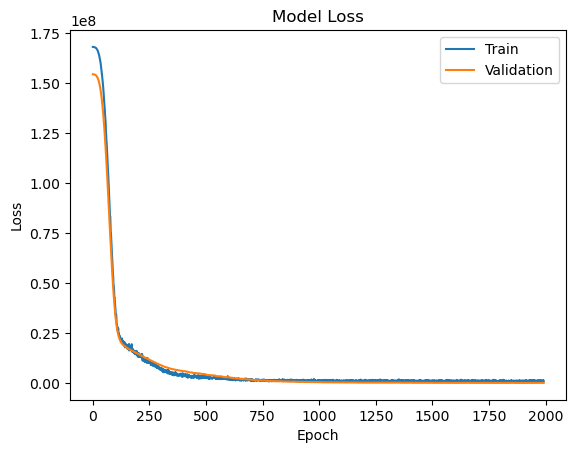

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### We need to give  scaled values input to the model to perform prediction

In [65]:
x = sc.fit_transform(x)

In [66]:
PREDICTION = model.predict([x])

5/5 [==============================] - 0s 1ms/step


In [67]:
OUTPUT = pd.DataFrame(zip(y, PREDICTION), columns=['ACTUAL', 'PREDICTION'])
OUTPUT.PREDICTION = OUTPUT.PREDICTION.astype(float)
OUTPUT

,ACTUAL,PREDICTION
0,13950.0,13933.672852
1,17450.0,17338.271484
2,17710.0,17438.365234
3,23875.0,23440.236328
4,16430.0,16402.404297
...,...,...
154,16845.0,16653.052734
155,19045.0,18746.656250
156,21485.0,21182.833984
157,22470.0,22180.369141


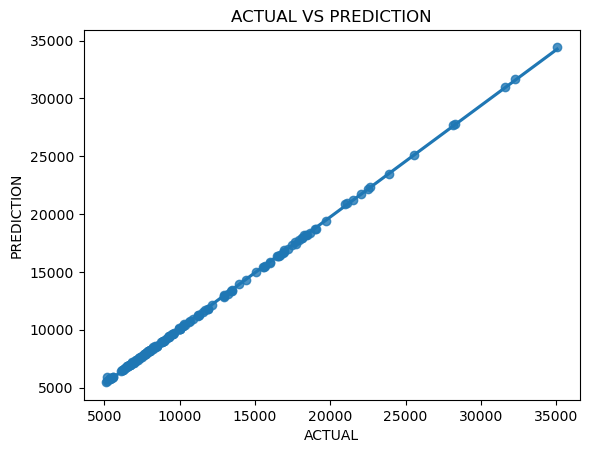

In [68]:
sns.regplot(data=OUTPUT, x='ACTUAL', y='PREDICTION')
plt.title("ACTUAL VS PREDICTION")
plt.show()

In [69]:
print(f'R2 Score :{r2_score(y, PREDICTION)}')

R2 Score :0.9983480331763638
